# Root finding - Part II
Introduction to Numerical Problem Solving, Spring 2017   
CC BY-NC-SA, Sakari Lukkarinen   
Helsinki Metropolia University of Applied Sciences

In [19]:
%pylab inline
import scipy.optimize as optimize
from numpy.polynomial.polynomial import polyval, polyroots, polyfromroots

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Evaluating polynomials

In [20]:
x0 = 1.0
c = [1, 2, 3]
polyval(x0, c)

6.0

In [21]:
def f(x):
    return 1 + 2*x + 3*x**3
f(x0)

6.0

In [22]:
def f(x, c):
    return c[0] + c[1]*x + c[2]*x**2
f(x0, c)

6.0

## Finding the roots of polynomials

Find the roots of polynomial $f(x) = -6 + 11x -6x^2 + x^3$

In [23]:
polyroots([-6, 11., -6, 1.])

array([ 1.,  2.,  3.])

$f(x) = (x-1)(x-2)(x-3)$

Convert back to polynomial coefficients

In [24]:
polyfromroots([1., 2., 3.])

array([ -6.,  11.,  -6.,   1.])

## Complex valued roots

Draw a polynomial function $f(x) = 1 + 2x + 3x^2$ and check if it has any real roots.

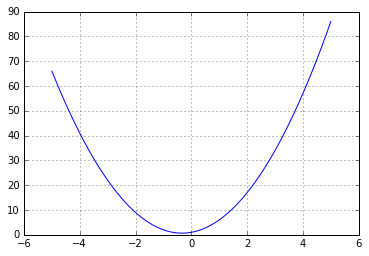

In [25]:
x = linspace(-5, 5, 1000)
y = polyval(x, [1, 2, 3])
plot(x, y)
grid()

In [26]:
r = polyroots([1., 2., 3.])
r

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

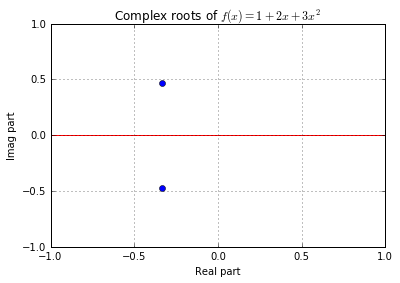

In [27]:
# Plotting the complex valued roots
plot(real(r), imag(r), 'o')
axhline(0, color = 'r')
xlim((-1, 1))
ylim((-1, 1))
xlabel('Real part')
ylabel('Imag part')
title('Complex roots of $f(x) = 1 + 2x + 3x^2$');
grid()

## Signal processing example

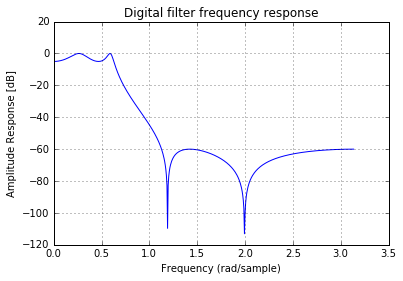

In [28]:
import scipy.signal as signal

# Create an IIR type filter
b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip')

# Draw the frequency response
w, h = signal.freqz(b, a)
plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

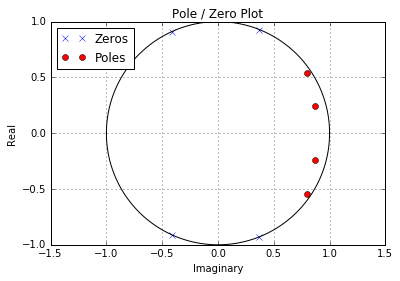

In [29]:
# Find the poles and zeros
z, p, k = signal.tf2zpk(b, a)

# Draw the pole-zero diagram
plt.plot(np.real(z), np.imag(z), 'xb')
plt.plot(np.real(p), np.imag(p), 'or')
plt.legend(['Zeros', 'Poles'], loc=2)

# Add a unit cirle
x = linspace(-1, 1, 1000)
y1 = sqrt(1-x**2)
y2 = -y1
plot(x, y1, 'k')
plot(x, y2, 'k')

axis('equal')
title('Pole / Zero Plot')
ylabel('Real')
xlabel('Imaginary')
grid()
show()

## Solving systems of nonlinear equations

### Problem
Determine the points of intersection between the circle $x^2+y^2=3$ and the hyperbola $xy=1$.

### Solution

First we reformulate the equations so that we have zeros on the right sides:

$$\begin{array}{r l}
x^2 + y^2 - 3 &= 0\\
xy - 1 & = 0
\end{array}$$

Next we rename the variables $x_0 = x$ and $x_1 = y$, and write a vector function


In [30]:
def f(x):
    f1 = x[0]**2 + x[1]**2 - 3
    f2 = x[0]*x[1] - 1
    return [f1, f2]

Now we can apply `root` function from `scipy.optimize` module and using initial guess $x = x[0] = 0.5$ and $y = x[1] = 1.5$.

In [31]:
from scipy.optimize import root
x0 = [0.5, 1.5]
r = root(f, x0)
r

    fjac: array([[-0.58381252, -0.8118885 ],
       [ 0.8118885 , -0.58381252]])
     fun: array([  0.00000000e+00,  -2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([ -9.20708768e-10,   4.83706707e-10])
       r: array([-1.9231426 , -2.50318187,  2.32543004])
  status: 1
 success: True
       x: array([ 0.61803399,  1.61803399])

In [32]:
# Get the solution
r.x

array([ 0.61803399,  1.61803399])

Visualize the solution. We draw the circle in two parts $y1 = \sqrt{3 - x^2}$ and $y2 = -y2$. 

In addition the hyperbola is drawn in two parts, as $y = 1/x$ goes to infinity when $x\approx 0$.

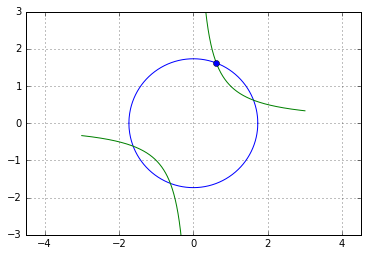

In [33]:
x = linspace(-sqrt(3), sqrt(3), 1000)
y1 = sqrt(3 - x**2)
y2 = -y1
plot(x, y1, 'b')
plot(x, y2, 'b')
x = linspace(-3, -0.1, 500)
y3 = 1/x
plot(x, y3, 'g')
x = linspace(0.1, 3, 500)
y3 = 1/x
plot(x, y3, 'g')

axis('equal')
ylim((-3, 3))
grid()

plot(r.x[0], r.x[1], 'o')

## Convergence visualization

Lastly we try several intial values in domain $x \in [-4, 4]$ and $y \in[-4, 4]$ and check where they converge.

- In the first part we draw the circle and hyperbola, once again. 
- In the second part we find all 4 roots using different initial guesses. 
- Lastly we loop values within the domain and check where those initial values converge. The results are illustrated as two dimensional plot.

solution 1: [ 0.61803399  1.61803399]
solution 2: [ 1.61803399  0.61803399]
solution 3: [-0.61803399 -1.61803399]
solution 4: [-1.61803399 -0.61803399]


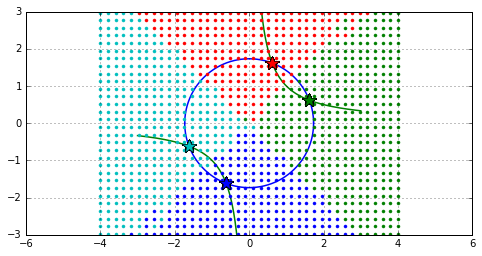

In [34]:
# Part 1 - Draw the equations
fig, ax = subplots(figsize=(8,4))
x = linspace(-sqrt(3), sqrt(3), 1000)
y1 = sqrt(3 - x**2)
y2 = -y1
ax.plot(x, y1, 'b', lw = 1.5)
ax.plot(x, y2, 'b', lw = 1.5)
x = linspace(-3, -0.1, 500)
y3 = 1/x
ax.plot(x, y3, 'g', lw = 1.5)
x = linspace(0.1, 3, 500)
y3 = 1/x
ax.plot(x, y3, 'g', lw = 1.5)

axis('equal')
ylim((-3, 3))
grid()

# Part 2 - Find all 4 solutions
sol1 = optimize.fsolve(f, [0, 2])
sol2 = optimize.fsolve(f, [2, 0])
sol3 = optimize.fsolve(f, [0, -2])
sol4 = optimize.fsolve(f, [-2, 0])
print("solution 1:", sol1)
print("solution 2:", sol2)
print("solution 3:", sol3)
print("solution 4:", sol4)

# Part 3 - illustrate the convergence
colors = ['r', 'g', 'b', 'c']
for m in linspace(-4, 4, 40):
    for n in linspace(-4, 4, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)
        
        for idx, s in enumerate([sol1, sol2, sol3, sol4]):
            if abs(s-sol).max() < 1e-8:
                ax.plot(sol[0], sol[1], colors[idx]+'*', markersize = 15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')